### Unsupervised Learning:

#### K-Means Clustering:

11. **Introduction to K-Means Clustering:**
    - Explain the K-Means algorithm for unsupervised clustering.
    - Discuss how it groups data points into clusters based on similarity.

12. **K-Means Clustering in Python:**
    - Implement K-Means clustering using a dataset.
    - Visualize and interpret the clusters.

### Real-World Project Demonstration:

13. **Project Overview: Predicting Customer Churn:**
    - Choose a dataset related to customer behavior and churn prediction.
    - Demonstrate the end-to-end process: data exploration, preprocessing, feature engineering, model training (Logistic Regression), and evaluation.

14. **Hands-On Session:**
    - Guide participants through the steps of building a machine learning model to predict customer churn.
    - Discuss challenges, feature importance, and ways to improve the model.

### Introduction to K-Means Clustering:

#### Explain the K-Means Algorithm for Unsupervised Clustering:

- **Objective:** K-Means is an unsupervised machine learning algorithm used for clustering, which is the process of grouping similar data points together based on certain features.

- **Key Concepts:**
  - **Centroids:** K-Means seeks to partition the data into 'K' clusters, where each cluster is represented by a centroid.
  - **Distance Metric:** It uses a distance metric (usually Euclidean distance) to measure the similarity between data points and centroids.
  - **Iterative Process:** The algorithm iteratively assigns data points to the nearest centroid and updates the centroids until convergence.


####  How it Groups Data Points into Clusters Based on Similarity:

1. **Initialization:**
   - Choose 'K' initial centroids (either randomly or strategically).

2. **Assignment:**
   - Assign each data point to the nearest centroid based on a distance metric.

3. **Update Centroids:**
   - Recalculate the centroids based on the mean of the data points assigned to each cluster.

4. **Repeat:**
   - Repeat steps 2 and 3 until convergence (when centroids don't change significantly).

In [26]:
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")

### Implement K means From Scratch

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Generate synthetic data
np.random.seed(42)
X = np.concatenate([np.random.randn(100, 2) + [5, 5],
                    np.random.randn(100, 2) + [-5, 5],
                    np.random.randn(100, 2) + [0, -5]])
X

array([[ 5.49671415e+00,  4.86173570e+00],
       [ 5.64768854e+00,  6.52302986e+00],
       [ 4.76584663e+00,  4.76586304e+00],
       [ 6.57921282e+00,  5.76743473e+00],
       [ 4.53052561e+00,  5.54256004e+00],
       [ 4.53658231e+00,  4.53427025e+00],
       [ 5.24196227e+00,  3.08671976e+00],
       [ 3.27508217e+00,  4.43771247e+00],
       [ 3.98716888e+00,  5.31424733e+00],
       [ 4.09197592e+00,  3.58769630e+00],
       [ 6.46564877e+00,  4.77422370e+00],
       [ 5.06752820e+00,  3.57525181e+00],
       [ 4.45561728e+00,  5.11092259e+00],
       [ 3.84900642e+00,  5.37569802e+00],
       [ 4.39936131e+00,  4.70830625e+00],
       [ 4.39829339e+00,  6.85227818e+00],
       [ 4.98650278e+00,  3.94228907e+00],
       [ 5.82254491e+00,  3.77915635e+00],
       [ 5.20886360e+00,  3.04032988e+00],
       [ 3.67181395e+00,  5.19686124e+00],
       [ 5.73846658e+00,  5.17136828e+00],
       [ 4.88435172e+00,  4.69889630e+00],
       [ 3.52147801e+00,  4.28015579e+00],
       [ 4.

numpy.linalg.norm  -> wil help to find Euclidean distance
np.argmin(..., axis=1) finds the index of the minimum distance, indicating the cluster assignment.

In [18]:
X[:, np.newaxis].shape

(300, 1, 2)

In [22]:
def kmeans(X, n_clusters, n_iterations=100):
    # Initialize centroids randomly
    centroids = X[np.random.choice(range(len(X)), n_clusters, replace=False)]

    for _ in range(n_iterations):
        # Assign each data point to the nearest centroid
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)

        # Update centroids based on the mean of data points in each cluster
        for i in range(n_clusters):
            centroids[i] = np.mean(X[labels == i], axis=0)

    return labels, centroids


# Apply the custom K-Means algorithm
n_clusters = 3
labels, centroids = kmeans(X, n_clusters)

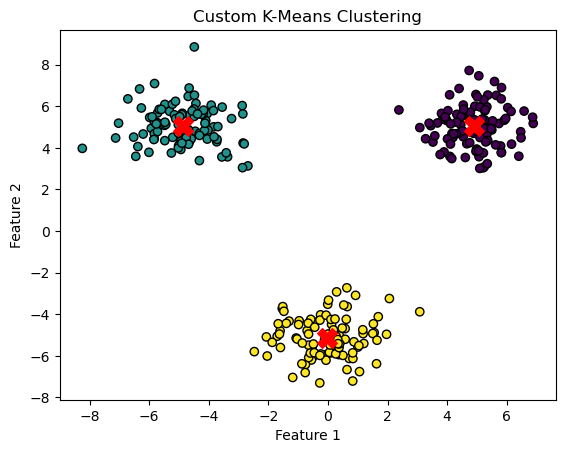

In [23]:
# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red')
plt.title('Custom K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [20]:
## Using Library
from sklearn.cluster import KMeans

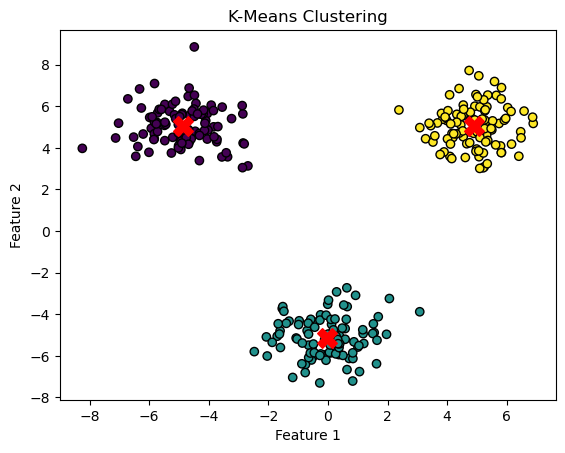

In [27]:
# Initialize K-Means with the number of clusters (K)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the standardized data
kmeans.fit(X)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()